<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/5_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 5.6 MB/s 


In [25]:
from sympy import *
from sympy.plotting import plot
import whit_phys_util as buc

In [ ]:
repo = buc.local_repository("")

In [33]:
tau = 2
fmax = 1
omega = 2*pi/tau

In [34]:
var('t')
f = Piecewise( (t + fmax, t < 0), (-t + fmax, 0<t) )
f

Piecewise((t + 1, t < 0), (1 - t, t > 0))

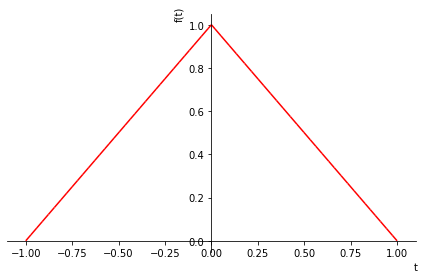

In [35]:
fig1 = plot(f, (t, -tau/2, tau/2), line_color="red", label="exact")

In [37]:
var('n', integer = True, positive=True)
f0 = integrate((1/tau)*f, (t,-tau/2,tau/2))

def fn(n):
  return integrate(2/tau*cos(n*omega*t)*f, (t, -tau/2, tau/2))

def f_approx(nmax,t):
  f_sym = f0 + Sum(fn(n)*cos(n*omega*t), (n, 1, nmax))
  return f_sym.doit()

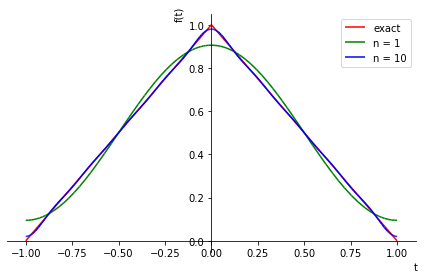

In [38]:
fig2 = plot(f_approx(1, t), (t, -tau/2, tau/2), show = False, line_color="green", label="n = 1")
fig3 = plot(f_approx(10, t), (t, -tau/2, tau/2), show = False, line_color="blue", label="n = 10")
fig1.legend = True
fig1.extend(fig2)
fig1.extend(fig3)
fig1.show()

In [45]:
beta = 0.1

def a(n):
  return fn(n)/sqrt((omega0**2 - n**2*omega**2)**2 + 4*beta**2*n**2*omega**2)

def delta(n):
  return atan2(2*beta*n*omega, omega0**2 - n**2*omega**2)

def x(nmax, t,tau0):
  omega0 = 2*pi/tau0
  sym_x = a0 + Sum(a(n)*cos(n*omega*t-delta(n)), (n, 1, nmax))
  return sym_x.doit()

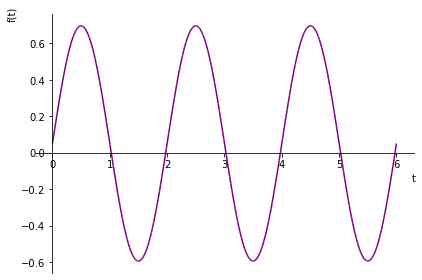

In [46]:
fig4 = plot(x(4, t, 2), (t, 0, 3*tau), line_color = 'purple', label='n = 4', show=False, adaptive=False)
fig4.show()

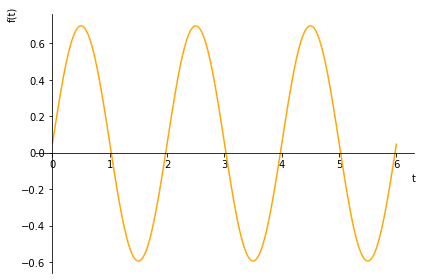

In [48]:
fig5 = plot(x(4,t,10),  (t, 0, 3*tau), line_color = 'orange', label='n = 4', show=False, adaptive=False)
fig5.show()